In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import hog
import scipy.interpolate as interp

In [2]:
def get_distance(v1,v2):
    
    if(len(v1)==len(v2)):
        dist = np.linalg.norm(np.array(v1)-np.array(v2))
    elif(len(v1)>len(v2)):
        v2_func = interp.interp1d(np.arange(len(v2)),v2)
        v2_mod = v2_func(0,len(v2)-1,len(v1))
        dist = np.linalg.norm(np.array(v1)-np.array(v2_mod))
    else:
        v1_func = interp.interp1d(np.arange(len(v1)),v1)
        v1_mod = v1_func(0,len(v1)-1,len(v2))
        dist = np.linalg.norm(np.array(v1_mod)-np.array(v2))
    return dist

In [12]:

text_file_path = "low_level_grl2.txt"
f = open(text_file_path,"r")
line = f.readline()
detections={}
comps = []
while(line):

    line = line.replace("\n", "")
    comps = line.split(",")

    if(comps[0] in detections):
        detections[comps[0]].append(list(map(float, comps[2:])))
    else:
        detections[comps[0]]=[]
        detections[comps[0]].append(list(map(float, comps[2:])))
    line=f.readline()
f.close()

first = detections['grl2/00010.jpg']
second = detections['grl2/00011.jpg']
print(len(second))
print([s[0:6] for s in first])
print([s[0:6] for s in second])
f0 = first[3][7:]
#f1 = first[1][7:]
#f2 = first[2][7:]
f3 = second[3][7:]
if(len(f3)!=len(f0)):
    int_512 = interp.interp1d(np.arange(len(f0)),f0)
    f0_128 = int_512(np.linspace(0,len(f0)-1,len(f3)))
    print(len(f3))
    print(len(f0_128))
#f4 = second[1][7:]
#f5 = second[2][7:]
    print(np.linalg.norm(np.array(f3)-np.array(f0_128)))
else:
    print(np.linalg.norm(np.array(f0)-np.array(f3)))
#print(np.linalg.norm(np.array(f1)-np.array(f4)))
#print(np.linalg.norm(np.array(f2)-np.array(f5)))

4
[[8.0, 0.953035, 159.0, 306.0, 417.0, 399.0], [8.0, 0.851539, 394.0, 625.0, 609.0, 772.0], [8.0, 0.839916, 663.0, 285.0, 1031.0, 414.0], [8.0, 0.830474, 0.0, 353.0, 73.0, 380.0]]
[[8.0, 0.966855, 159.0, 306.0, 417.0, 401.0], [8.0, 0.849438, 387.0, 630.0, 614.0, 771.0], [8.0, 0.849161, 659.0, 286.0, 1031.0, 414.0], [8.0, 0.631485, 0.0, 355.0, 75.0, 383.0]]
2.001269883699097


2048
2048
2048
same 2
2048
9.830802248560033
2048
2048
2048
128
same 4
2048
8.996622947231645
2048
2048
2048
same 6
2048
7.52640814480978
2048
2048
2048
128
same 8
2048
5.823950760527857
2048
2048
2048
128
same 10
2048
7.302198114878971
2048
2048
2048
128
same 12
2048
8.598396496091176
2048
2048
2048
same 14
2048
10.306558769939606


TypeError: Image data cannot be converted to float

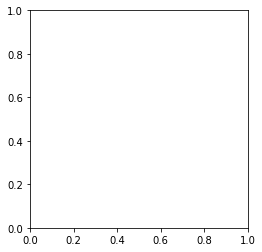

In [5]:
## num = '392'
frameCount=0
total_frames=641
dists_l = []
dists_m = []
dists_s = []
video_name = 'grl2'
while(frameCount<total_frames-1):
    frameCount+=1
    if('%s/%s.jpg'%(video_name,str(frameCount).zfill(5)) in detections and '%s/%s.jpg'%(video_name,str(frameCount+1).zfill(5)) in detections):
        #print('found',frameCount)
        currs = [d for d in detections['%s/%s.jpg'%(video_name,str(frameCount).zfill(5))] if d[0]==8]
        for c in currs:
            print(len(c[7:]))
        if(len(currs)==0):
            continue
        curr = currs[0]
        img_curr = cv.imread('../%s/%s.jpg'%(video_name,str(frameCount).zfill(5)))
        xmin = int(curr[2])
        ymin = int(curr[3])
        xmax =int(curr[4])
        ymax =int(curr[5])
                    
        cv.rectangle(img_curr, (int(xmin), int(ymin)), (int(xmax),int(ymax)), (255,0,0), 2)

        frameCount +=1
        nexts = [d for d in detections['%s/%s.jpg'%(video_name,str(frameCount).zfill(5))] if d[0]==8]
        if(len(nexts)==0):
            continue
        next_ = nexts[0]
        img_next = cv.imread('../%s/%s.jpg'%(video_name,str(frameCount).zfill(5)))
        xmin = int(next_[2])
        ymin = int(next_[3])
        xmax =int(next_[4])
        ymax =int(next_[5])
        cv.rectangle(img_next, (int(xmin), int(ymin)), (int(xmax),int(ymax)), (255,0,0), 2)
        f0 = curr[7:]
        f1 = next_[7:]
        if(len(f0)==len(f1)):
            print('same',frameCount)
            print(len(f0))
            dist = np.linalg.norm(np.array(f0)-np.array(f1))
            if(dist>10000):
                continue
            print(dist)
            if(len(f0)==128):
                dists_l.append(dist)
                
                
            elif(len(f0)==512):
                dists_m.append(dist)
            elif(len(f0)==2048):
                dists_s.append(dist)
            else:
                print('error')
            #if(dist>1.5):
                #plt.figure()
                #plt.imshow(img_curr)
                #plt.figure()
                #plt.imshow(img_next)
            dist = np.linalg.norm(np.array(f0)-np.array(f1))
            if(dist>10):
                plt.figure()
                plt.imshow(img_curr)
                plt.figure()
                plt.imshow(img_next)
            
        else:
            print('not same',frameCount)
       
    
    

34
2.4132177632082485
1.0775833725640727
6.102826582840692
1.0583259558127638
88
4.9595478154244805
2.7304411261221975
16.667575600700243
1.76450434291928
92
10.257445038466868
4.238699494526867
20.8200757830969
3.6203647704297697


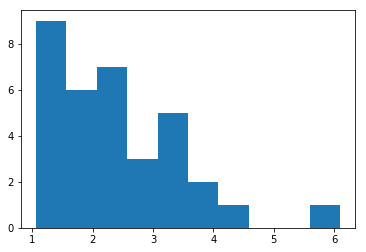

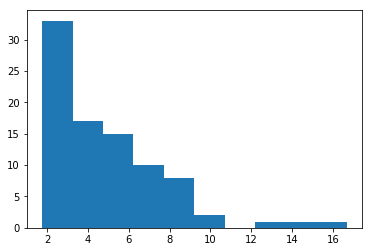

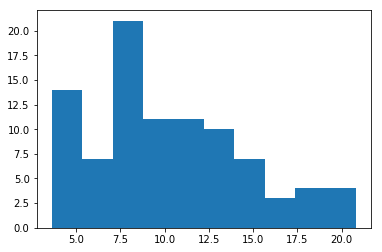

In [10]:
print(len(dists_l))
if(len(dists_l)>0):
    print(np.average(dists_l))
    print(np.std(dists_l))
    print(np.max(dists_l))
    print(np.min(dists_l))
    plt.hist(dists_l)
print(len(dists_m))
if(len(dists_m)>0):
    print(np.average(dists_m))
    print(np.std(dists_m))
    print(np.max(dists_m))
    print(np.min(dists_m))
    plt.figure()

    plt.hist(dists_m)
print(len(dists_s))
if(len(dists_s)>0):
    print(np.average(dists_s))
    print(np.std(dists_s))
    print(np.max(dists_s))
    print(np.min(dists_s))
    plt.figure()
    plt.hist(dists_s)

in frame 1
2048
2048
2048
in frame 3
2048
2048
2048
128
in frame 5
2048
2048
2048
in frame 7
2048
2048
2048
128
in frame 9
2048
2048
2048
128
in frame 11
2048
2048
2048
128
in frame 13
2048
2048
2048
in frame 15
2048
2048
128
2048
in frame 17
2048
2048
2048
128
in frame 19
2048
2048
2048
in frame 21
2048
2048
2048
in frame 23
2048
2048
2048
128
23.049739954774303
24
in frame 25
2048
2048
128
2048
in frame 27
2048
2048
128
2048
26.479149627215733
28
in frame 29
2048
2048
2048
in frame 31
2048
2048
2048
in frame 33
2048
2048
128
2048
25.59655438214312
34
in frame 35
2048
2048
2048
128
in frame 37
2048
2048
2048
128
27.56977543809583
38
in frame 39
2048
2048
2048
23.95767591468315
40
in frame 41
2048
2048
2048
in frame 43
2048
2048
2048
in frame 45
2048
2048
2048
23.64317921597878
46
in frame 47
2048
2048
2048
in frame 49
2048
2048
2048
in frame 51
2048
2048
2048
in frame 53
2048
2048
2048
in frame 55
2048
2048
2048
in frame 57
2048
2048
2048
in frame 59
2048
2048
in frame 61
2048
2048
20

IndexError: list index out of range

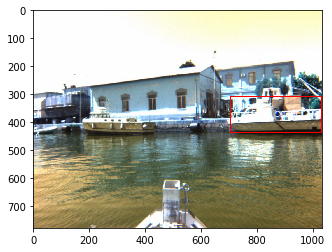

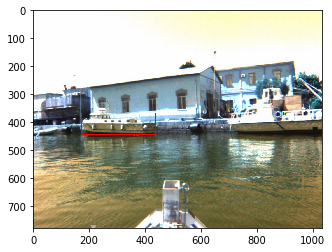

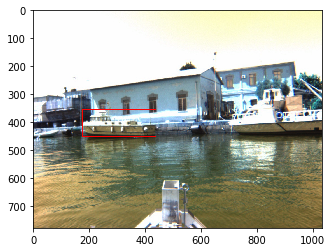

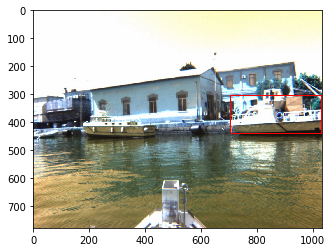

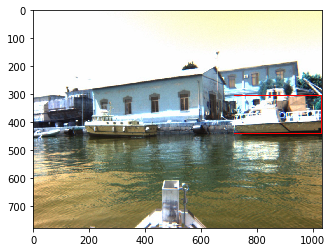

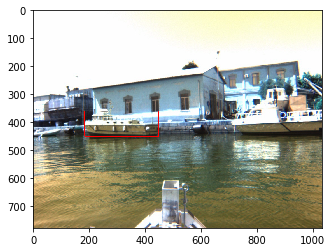

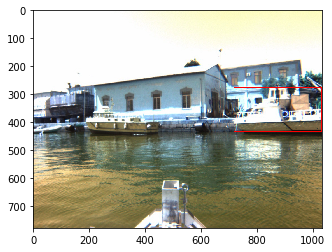

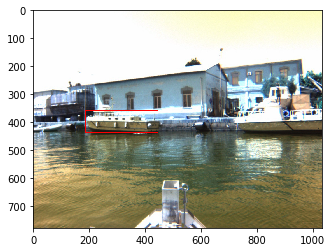

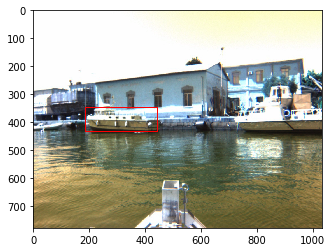

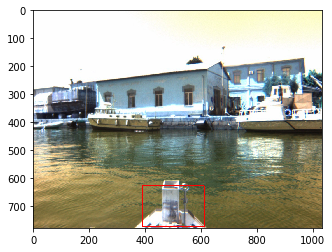

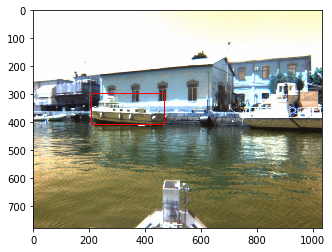

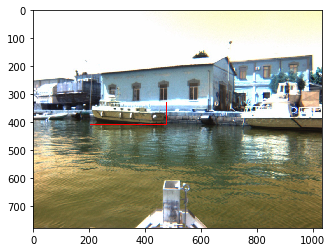

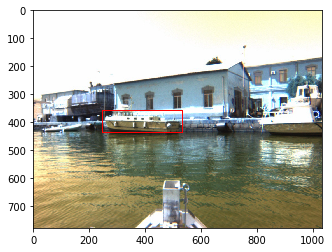

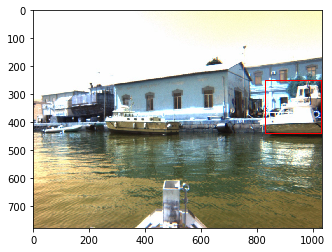

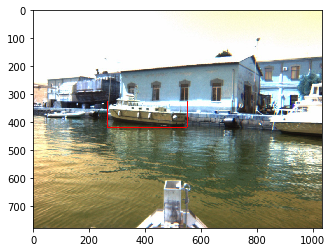

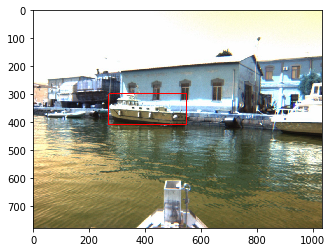

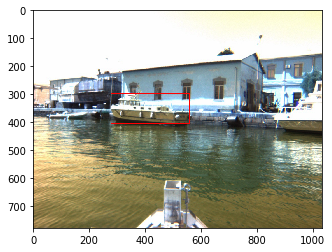

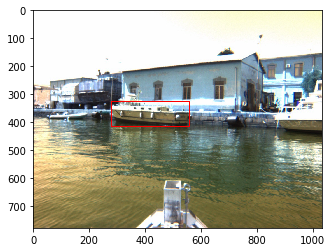

In [8]:
## num = '392'
frameCount=0
total_frames=641
dists_s = []
dists_o = []
video_name = 'grl2'
input_path = 'graal_2'
while(frameCount<460):
    frameCount+=1
    if('%s/%s.jpg'%(video_name,str(frameCount).zfill(5)) in detections and '%s/%s.jpg'%(video_name,str(frameCount+1).zfill(5)) in detections):
        #print('found',frameCount)
        currs = [d for d in detections['%s/%s.jpg'%(video_name,str(frameCount).zfill(5))] if d[0]==8]
        print('in frame',frameCount)
        
        if(len(currs)==0):
            continue
        curr = currs[0]
        curr_o = currs[1]
        img_curr = cv.imread('../%s/%s.jpg'%(input_path,str(frameCount).zfill(5)))
        xmin = int(curr[2])
        ymin = int(curr[3])
        xmax =int(curr[4])
        ymax =int(curr[5])
                    
        cv.rectangle(img_curr, (int(xmin), int(ymin)), (int(xmax),int(ymax)), (255,0,0), 2)

        frameCount +=1
        nexts = [d for d in detections['%s/%s.jpg'%(video_name,str(frameCount).zfill(5))] if d[0]==8]
        if(len(nexts)==0):
            continue
        next_ = nexts[0]
        img_next = cv.imread('../%s/%s.jpg'%(input_path,str(frameCount).zfill(5)))
        xmin = int(next_[2])
        ymin = int(next_[3])
        xmax =int(next_[4])
        ymax =int(next_[5])
        cv.rectangle(img_next, (int(xmin), int(ymin)), (int(xmax),int(ymax)), (255,0,0), 2)
        f0 = curr[7:]
        f_o = curr_o[7:]
        f1 = next_[7:]
        if(len(f0)==len(f1)):
            
            dist = np.linalg.norm(np.array(f0)-np.array(f1))
            if(dist>10000):
                continue
            if(dist>20):
                
                plt.figure()
                plt.imshow(img_curr)
                plt.figure()
                plt.imshow(img_next)
                print(dist)
                print(frameCount)
            dists_s.append(dist)
            
        if(len(f_o)==len(f0)):
            dist = np.linalg.norm(np.array(f0)-np.array(f_o))
            if(dist>10000):
                continue
            dists_o.append(dist)
    
    

50
23.65490671652268
2.1134454535349776
29.148527912123576
20.098283454500486
50
11.440017589834419
5.903840729448108
27.56977543809583
2.5231414290356375


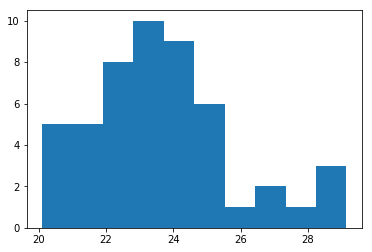

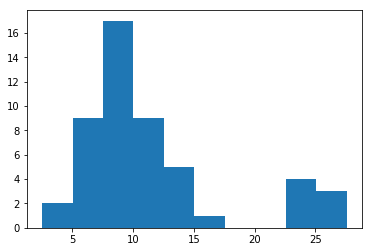

In [34]:
print(len(dists_o))
if(len(dists_o)>0):
    print(np.average(dists_o))
    print(np.std(dists_o))
    print(np.max(dists_o))
    print(np.min(dists_o))
    plt.figure()

    plt.hist(dists_o)
print(len(dists_s))
if(len(dists_s)>0):
    print(np.average(dists_s))
    print(np.std(dists_s))
    print(np.max(dists_s))
    print(np.min(dists_s))
    plt.figure()
    plt.hist(dists_s)

In [57]:
print(np.average(dists_l))
print(np.std(dists_l))
print(np.max(dists_l))
print(np.min(dists_l))
plt.hist(dists_l)

nan
nan


ValueError: zero-size array to reduction operation maximum which has no identity

In [12]:
def bounding_box_naive(points):
    """returns a list containing the bottom left and the top right 
    points in the sequence
    Here, we use min and max four times over the collection of points
    """
    

    top_left_x = min(point[0][0] for point in points)
    top_left_y = min(point[0][1] for point in points)
    bot_right_x = max(point[0][0] for point in points)
    bot_right_y = max(point[0][1] for point in points)

    center_x = (top_left_x+bot_right_x)/2
    center_y = (top_left_y+bot_right_y)/2
     
    return [center_x,center_y,bot_right_x-top_left_x,bot_right_y-top_left_y]
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 0.03))
feature_params = dict( maxCorners = 20,
                       qualityLevel = 0.2,
                       minDistance = 7,
                       blockSize = 7 )

[137.5, 210.0, 201.0, 116.0]
37 238 152 268


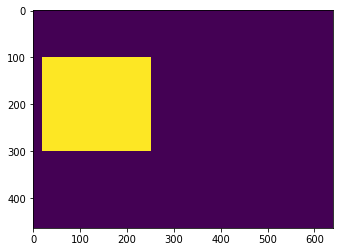

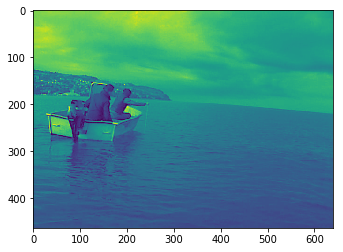

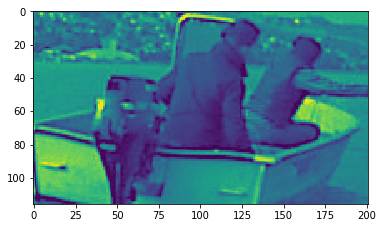

In [13]:
img = cv.imread('../modd/00150.jpg')

frame_grey = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
mask = np.zeros(frame_grey.shape, dtype = "uint8")
cv.rectangle(mask, (20, 100), (250,300), (255, 255, 255), -1)
plt.imshow(mask)
p0 = cv.goodFeaturesToTrack(frame_grey,mask=mask,  **feature_params)
plt.figure()
plt.imshow(frame_grey)
plt.figure()
box = bounding_box_naive(p0)
print(box)
print(int(box[0]-(box[2]/2)),int(box[0]+(box[2]/2)),int(box[1]-(box[3]/2)),int(box[1]+(box[3]/2)))
new_mod= frame_grey[int(box[1]-(box[3]/2)):int(box[1]+(box[3]/2)),int(box[0]-(box[2]/2)):int(box[0]+(box[2]/2))]
plt.imshow(new_mod)

In [14]:
x= hog(new_mod,feature_vector=True)

In [11]:
hog??

In [ ]:
next_frame = cv.imread('../modd/00170.jpg')
next_frame_grey = cv.cvtColor(next_frame,cv.COLOR_BGR2GRAY)
plt.imshow(next_frame_grey)
plt.figure()
niente = next_frame_grey[150:300,50:300]
plt.imshow(niente)
new_niente = cv.resize(niente,(int(new_mod.shape[1]),int(new_mod.shape[0])))
plt.figure()
plt.imshow(new_niente)

In [5]:
y = hog(new_niente,feature_vector=True)

NameError: name 'new_niente' is not defined

In [6]:
dist = np.linalg.norm(x-y)
print(dist)

NameError: name 'x' is not defined

In [7]:
hog??

[0.  1.2 2.4 3.6 4.8 6. ]


Text(0.5, 1.0, '"stretch"')

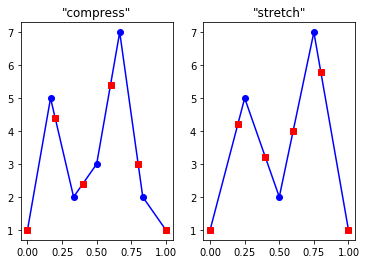

In [40]:
import numpy as np
import scipy.interpolate as interp
import matplotlib.pyplot as plt

arr_ref = np.array([1, 5, 2, 3, 7, 1])  # shape (6,), reference
arr1 = np.array([1, 5, 2, 3, 7, 2, 1])  # shape (7,), to "compress"
arr2 = np.array([1, 5, 2, 7, 1])        # shape (5,), to "stretch"
arr1_interp = interp.interp1d(np.arange(arr1.size),arr1)
arr1_compress = arr1_interp(np.linspace(0,arr1.size-1,arr_ref.size))
arr2_interp = interp.interp1d(np.arange(arr2.size),arr2)
arr2_stretch = arr2_interp(np.linspace(0,arr2.size-1,arr_ref.size))
print(np.linspace(0,arr1.size-1,arr_ref.size))
# plot the examples, assuming same x_min, x_max for all data
xmin,xmax = 0,1
fig,(ax1,ax2) = plt.subplots(ncols=2)
ax1.plot(np.linspace(xmin,xmax,arr1.size),arr1,'bo-',
         np.linspace(xmin,xmax,arr1_compress.size),arr1_compress,'rs')
ax2.plot(np.linspace(xmin,xmax,arr2.size),arr2,'bo-',
         np.linspace(xmin,xmax,arr2_stretch.size),arr2_stretch,'rs') 
ax1.set_title('"compress"')
ax2.set_title('"stretch"')

In [47]:
np.linspace??